# Amplitudes fitting

Importing all necessary stuff:

In [21]:
import numpy as np
from statistics import stdev
from matplotlib import pyplot as plt #this is the traditional method

Getting data from files:

In [ ]:
file_name = 'amplitudes.csv'
file_folder = 'data/sample data/'
data_file = file_folder + file_name

frequencies_gen, amplitude_F, amplitude_R, amplitude_L, amplitude_C  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

We now define the function we are going to fit the data with: $$ V_R = \frac{R_rV_0}{\sqrt{R^2+{ \left(\omega L - \frac{1}{\omega C}\right)}^2}}$$
$$ V_L = \frac{\omega L V_0}{\sqrt{R^2+{ \left(\omega L - \frac{1}{\omega C}\right)}^2}}$$
$$ V_C = \frac{\frac{V_0}{\omega C}}{\sqrt{R^2+{ \left(\omega L - \frac{1}{\omega C}\right)}^2}}$$

 $\omega = 2 \pi f$ with $f$ being the sinusoidal generator frequency. We've chosen to estimate the uncertainty associated to the amplitude measures with the sample standard deviation $\sigma$ since how the DAQ program outputs the amplitude values is not known.


In [23]:
def resistance_amp_model(f, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den

We now have to make our initial guess of the fitting parameters

In [24]:
#initial guesses
R_r = 997.8
R = 1174.2
L = 0.0472
C = 1.47e-9
V_0 = 0.5

initial_guess = np.array([R_r , R, L, C, V_0])
# initial_error = np.array([delta_V0, delta_theta, delta_V1])
old_fit = np.copy(initial_guess)  # save a copy to compare new with old

# estimated_error = photodiode_error(theta, delta_V0, delta_theta, delta_V1,
#                                    V0, theta0)    #propagate uncertainty using initial values

In [25]:
from statistics import stdev

amplitude_stdev = stdev(amp_R)
amplitude_stdev

0.06048302751076127

### Curve fit routine
We are now going to use curve_fit function from scipy

In [26]:
# load curve_fit routine from scipy
from scipy.optimize import curve_fit # import method used here

# the method returns two arrays: one with the resulting fit parameters and then the covariance matrix
fit, covariance = curve_fit(resistance_amp_model, f_gen, amp_R,
                            p0 = initial_guess)
                            # sigma = estimated_error, absolute_sigma = True)

error = np.sqrt(np.diag(covariance))

print(old_fit)
print(fit)

old_fit = np.copy(fit)

print()
print('R_r    = ','{:.3f}'.format(fit[0]), '±', '{:.3f}'.format(error[0]), ' $\Omega$')
print('R    = ','{:.3f}'.format(fit[1]), '±', '{:.3f}'.format(error[1]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit[2]), '±', '{:.3f}'.format(error[2]), ' Henry')
print('C    = ','{:.12f}'.format(fit[3]), '±', '{:.12f}'.format(error[3]), ' F')
print('V_0    = ','{:.3f}'.format(fit[4]), '±', '{:.3f}'.format(error[4]), ' V')


[9.9780e+02 1.1742e+03 4.7200e-02 1.4700e-09 5.0000e-01]
[1.02841368e+03 2.32679165e+03 4.98005586e-02 1.35262930e-09
 5.13869591e-01]

R_r    =  1028.414 ± nan  $\Omega$
R    =  2326.792 ± nan  $\Omega$
L    =  0.04980 ± nan  Henry
C    =  0.000000001353 ± nan  F
V_0    =  0.514 ± nan  V


/var/folders/wx/z_3n9gy53dzd_bsxjtdg_t4h0000gn/T/ipykernel_3820/2452547715.py:9: RuntimeWarning: invalid value encountered in sqrt
  error = np.sqrt(np.diag(covariance))


In [27]:
new_initial_values = np.array([fit[0], fit[1], fit[2],fit[3],fit[4]])

# estimated_error = photodiode_error(theta, delta_V0, delta_theta, delta_V1,
#                                    fit[0], fit[1]) # propagate error using new values for V0, etc

fit, covariance = curve_fit(resistance_amp_model, f_gen, amp_R,
                            p0 = initial_guess)
# sigma = estimated_error, absolute_sigma = True)

# error = np.sqrt(np.diag(covariance))

print(old_fit)
print(fit)

old_fit = np.copy(fit)

V_Rmodel = resistance_amp_model(f_gen, fit[0], fit[1], fit[2], fit[3],fit[4])
residual = amp_R - V_Rmodel

# data_uncertainty = photodiode_error(theta, delta_V0, delta_theta, delta_V1, fit[0], fit[1])
#
# chisq = sum((residual/ data_uncertainty)**2) #typo corrected
# degrees_of_freedom = len(residual) - len(initial_guess)
# reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
# CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent
#
# print('chi-square         = ',chisq)
# print('degrees of freedom = ',degrees_of_freedom)
# print('reduced chi-square = ',reduced_chisq)
# print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)

[1.02841368e+03 2.32679165e+03 4.98005586e-02 1.35262930e-09
 5.13869591e-01]
[1.02841368e+03 2.32679165e+03 4.98005586e-02 1.35262930e-09
 5.13869591e-01]


Now importing [matplotlib](https://matplotlib.org) used for graphical output

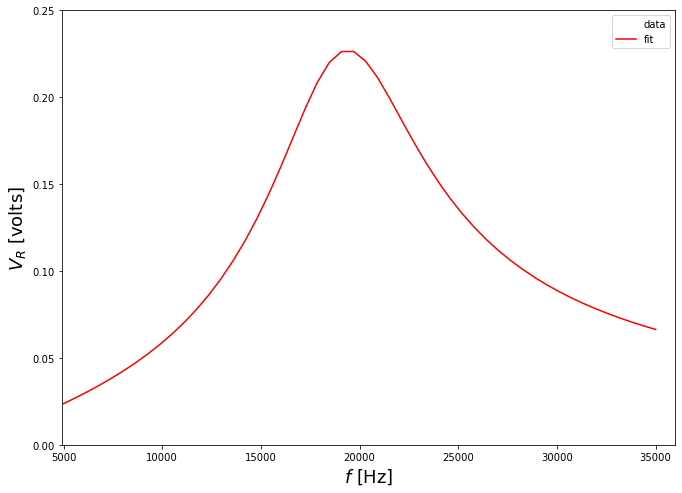

In [28]:
%matplotlib inline

plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
#for default size, type plt.figure() 

plt.xlabel(r"$f$ [Hz]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_R$ [volts]", fontsize = 18)   #use 18 point font for label text

# plot the data as before in blue
plt.errorbar(f_gen, amp_R,
             xerr=None, yerr=None,
             linestyle = 'none',
             color = 'blue',
             capsize = 3, capthick = 1, label = "data")

#create curve showing fit to data 
freq_fit = np.linspace(5000, 35000, 50)
VR_fit = resistance_amp_model(freq_fit, fit[0], fit[1], fit[2],fit[3],fit[4])

#plot the curve fit in red
plt.errorbar(freq_fit, VR_fit, xerr = None, yerr = None, color = 'red', label = 'fit' )
plt.xlim(4900 , 36000)
plt.ylim(0.0,0.25)
# plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
#            ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')

plt.savefig('Resistor-amplitude.pdf')
plt.show()


## Goodness of fit

Now we are going to calculate the chi-square of the fit.

In [29]:
V_Rmodel = resistance_amp_model(f_gen, fit[0], fit[1], fit[2], fit[3],fit[4])
residual = amp_R - V_Rmodel